<a href="https://colab.research.google.com/github/Ferdaus71/ML_Lab-performance/blob/main/ML_LAB(final)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
file_path = "/content/synthetic_employee_data.csv"
df = pd.read_csv(file_path)

Perform **preproessing**

In [ ]:
# Handle missing values
df.dropna(inplace=True)

# Encode categorical features
categorical_cols = ['Department', 'Education_Level', 'Location']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Scale numerical features
numerical_cols = ['Age', 'Salary', 'Years_at_Company']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the preprocessed data
display(df.head())

,Employee_ID,Employee_Name,Age,Salary,Years_at_Company,Number_of_Projects,Performance_Score,Is_Manager,Works_Remotely,Department,Education_Level,Location,Hire_Date
0,E00001,Jane Miller,13.319752,144.987137,7.814313,3.0,4.0,0.0,1.0,10,7,7,2021-02-06 15:47:20.059563
1,E00002,Mike Smith,-2.912372,108.281861,-2.085291,2.0,4.0,0.0,0.0,0,2,3,2020-09-23 15:47:20.059563
2,E00003,Alex Smith,-2.912372,86.258695,-2.345807,2.0,3.0,1.0,0.0,5,5,0,2018-04-10 15:47:20.059563
3,E00004,Jane Johnson,13.319752,-0.581597,7.553797,3.0,3.0,0.0,0.0,9,5,1,2016-02-10 15:47:20.059563
4,E00005,John Johnson,-2.912372,1.203990,-2.606322,6.0,2.0,0.0,0.0,4,6,2,2020-05-14 15:47:20.059563


**Outlier removal**

In [ ]:
numerical_cols_outliers = ['Age', 'Salary', 'Years_at_Company', 'Number_of_Projects', 'Performance_Score']

for col in numerical_cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

display(df.head())

,Employee_ID,Employee_Name,Age,Salary,Years_at_Company,Number_of_Projects,Performance_Score,Is_Manager,Works_Remotely,Department,Education_Level,Location,Hire_Date
8,E00009,Emily Brown,-0.498364,-0.068922,-0.261679,2.0,3.0,0.0,0.0,9,5,1,2025-04-04 15:47:20.059563
9,E00010,Emily Jones,0.583778,-1.186084,-0.001164,5.0,4.0,0.0,0.0,0,1,4,2015-12-29 15:47:20.059563
10,E00011,Mike Brown,-0.498364,-1.031602,0.519868,5.0,3.0,1.0,1.0,10,7,1,2024-01-23 15:47:20.059563
11,E00012,Laura Garcia,-0.498364,-0.625147,-0.261679,6.0,3.0,1.0,1.0,9,3,3,2016-12-31 15:47:20.059563
12,E00013,Chris Johnson,0.250811,-0.227277,1.822448,8.0,4.0,0.0,0.0,8,5,3,2015-11-14 15:47:20.059563


**Visualization of relationships**

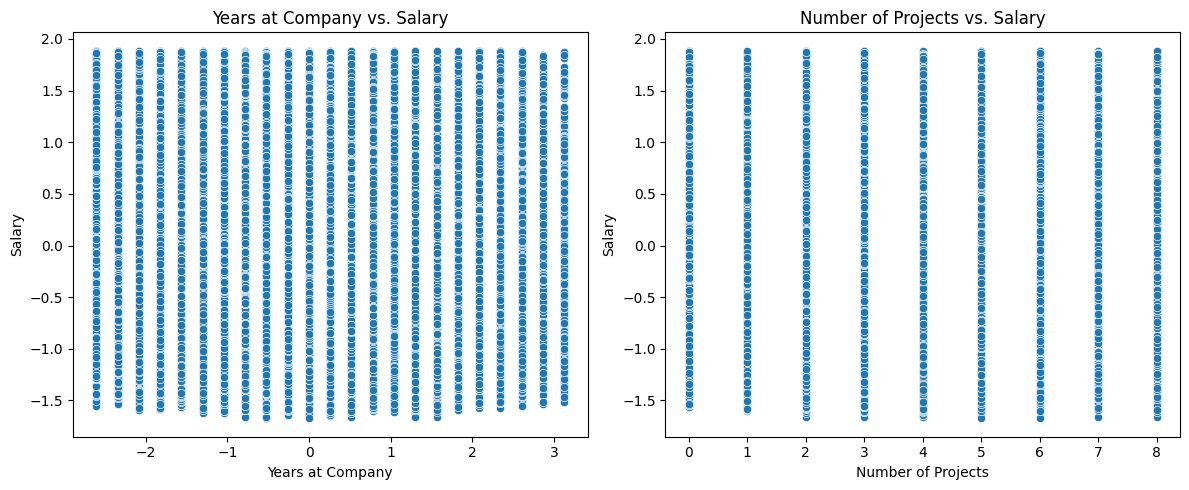

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Years_at_Company', y='Salary')
plt.title('Years at Company vs. Salary')
plt.xlabel('Years at Company')
plt.ylabel('Salary')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Number_of_Projects', y='Salary')
plt.title('Number of Projects vs. Salary')
plt.xlabel('Number of Projects')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()


Select the relevant features and split the data into features (X) and target (y).



In [ ]:
# Identify the relevant features for predicting 'Salary'
feature_cols = [col for col in df.columns if col not in ['Employee_ID', 'Employee_Name', 'Hire_Date', 'Salary']]

# Separate the data into features (X) and target (y)
X = df[feature_cols]
y = df['Salary']

# Display the first 5 rows of X and the first 5 values of y
display(X.head())
display(y.head())

,Age,Years_at_Company,Number_of_Projects,Performance_Score,Is_Manager,Works_Remotely,Department,Education_Level,Location
8,-0.498364,-0.261679,2.0,3.0,0.0,0.0,9,5,1
9,0.583778,-0.001164,5.0,4.0,0.0,0.0,0,1,4
10,-0.498364,0.519868,5.0,3.0,1.0,1.0,10,7,1
11,-0.498364,-0.261679,6.0,3.0,1.0,1.0,9,3,3
12,0.250811,1.822448,8.0,4.0,0.0,0.0,8,5,3


,Salary
8,-0.068922
9,-1.186084
10,-1.031602
11,-0.625147
12,-0.227277


## Split data
Split the data into training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,Age,Years_at_Company,Number_of_Projects,Performance_Score,Is_Manager,Works_Remotely,Department,Education_Level,Location
612778,-0.997814,0.519868,4.0,4.0,0.0,1.0,0,4,5
816934,0.583778,0.519868,7.0,3.0,1.0,0.0,2,1,0
108727,0.084328,0.780384,4.0,5.0,0.0,0.0,6,1,1
809894,0.167569,0.780384,2.0,2.0,1.0,0.0,5,0,5
805676,-0.664847,-1.043227,1.0,3.0,0.0,1.0,8,1,3


,Age,Years_at_Company,Number_of_Projects,Performance_Score,Is_Manager,Works_Remotely,Department,Education_Level,Location
936018,-0.165397,0.259352,4.0,4.0,0.0,0.0,6,1,9
814529,-0.165397,-0.261679,3.0,3.0,0.0,0.0,7,0,7
283689,-0.415122,-0.522195,3.0,2.0,0.0,1.0,3,4,8
869804,1.332952,0.780384,5.0,3.0,0.0,0.0,7,1,6
69028,0.417294,-0.522195,2.0,3.0,1.0,0.0,11,7,1


,Salary
612778,0.112803
816934,-0.668243
108727,0.222487
809894,-0.934631
805676,-1.019241


,Salary
936018,-0.705919
814529,0.171742
283689,-0.031944
869804,0.659585
69028,-0.164994


## Build and train model
Create and train a linear regression model using the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make predictions
Use the trained linear regression model to make predictions on the test features.

In [ ]:
y_pred = model.predict(X_test)

## Evaluate model
Calculate the Mean Absolute Error (MAE) to evaluate the model's performance.


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.5894512363524621


Categorize the 'Performance_Score' column.

In [ ]:
def categorize_performance(score):
    if score > 70:
        return 'high'
    elif score < 50:
        return 'low'
    else:
        return 'medium'

df['Performance_Category'] = df['Performance_Score'].apply(categorize_performance)

In [ ]:
df['Performance_Category'].value_counts()

,count
Performance_Category,
low,866524


Prepare data for Naive Bayes classification.

In [ ]:
X_nb = df.drop(['Employee_ID', 'Employee_Name', 'Hire_Date', 'Salary', 'Performance_Score', 'Performance_Category'], axis=1)
y_nb = df['Performance_Category']

Split data into training and testing sets for Naive Bayes.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)

Initialize and train the Naive Bayes classifier.

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)

GaussianNB()

Make predictions on the test set.

In [ ]:
y_pred_nb = nb_model.predict(X_test_nb)

Evaluate the Naive Bayes model.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
report_nb = classification_report(y_test_nb, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("Naive Bayes Classification Report:")
print(report_nb)

Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
              precision    recall  f1-score   support

         low       1.00      1.00      1.00    173305

    accuracy                           1.00    173305
   macro avg       1.00      1.00      1.00    173305
weighted avg       1.00      1.00      1.00    173305



## Prepare data for neural network

### Subtask:
Select the features and target variable for the neural network model.


In [ ]:
X_nn = df.drop(['Employee_ID', 'Employee_Name', 'Hire_Date', 'Salary', 'Performance_Category'], axis=1)
y_nn = df['Performance_Score']

display(X_nn.head())
display(y_nn.head())

,Age,Years_at_Company,Number_of_Projects,Performance_Score,Is_Manager,Works_Remotely,Department,Education_Level,Location
8,-0.498364,-0.261679,2.0,3.0,0.0,0.0,9,5,1
9,0.583778,-0.001164,5.0,4.0,0.0,0.0,0,1,4
10,-0.498364,0.519868,5.0,3.0,1.0,1.0,10,7,1
11,-0.498364,-0.261679,6.0,3.0,1.0,1.0,9,3,3
12,0.250811,1.822448,8.0,4.0,0.0,0.0,8,5,3


,Performance_Score
8,3.0
9,4.0
10,3.0
11,3.0
12,4.0


In [ ]:
X_nn = X_nn.drop('Performance_Score', axis=1)

display(X_nn.head())

,Age,Years_at_Company,Number_of_Projects,Is_Manager,Works_Remotely,Department,Education_Level,Location
8,-0.498364,-0.261679,2.0,0.0,0.0,9,5,1
9,0.583778,-0.001164,5.0,0.0,0.0,0,1,4
10,-0.498364,0.519868,5.0,1.0,1.0,10,7,1
11,-0.498364,-0.261679,6.0,1.0,1.0,9,3,3
12,0.250811,1.822448,8.0,0.0,0.0,8,5,3



Split the data



In [ ]:
from sklearn.model_selection import train_test_split

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

display(X_train_nn.head())
display(X_test_nn.head())
display(y_train_nn.head())
display(y_test_nn.head())

,Age,Years_at_Company,Number_of_Projects,Is_Manager,Works_Remotely,Department,Education_Level,Location
612778,-0.997814,0.519868,4.0,0.0,1.0,0,4,5
816934,0.583778,0.519868,7.0,1.0,0.0,2,1,0
108727,0.084328,0.780384,4.0,0.0,0.0,6,1,1
809894,0.167569,0.780384,2.0,1.0,0.0,5,0,5
805676,-0.664847,-1.043227,1.0,0.0,1.0,8,1,3


,Age,Years_at_Company,Number_of_Projects,Is_Manager,Works_Remotely,Department,Education_Level,Location
936018,-0.165397,0.259352,4.0,0.0,0.0,6,1,9
814529,-0.165397,-0.261679,3.0,0.0,0.0,7,0,7
283689,-0.415122,-0.522195,3.0,0.0,1.0,3,4,8
869804,1.332952,0.780384,5.0,0.0,0.0,7,1,6
69028,0.417294,-0.522195,2.0,1.0,0.0,11,7,1


,Performance_Score
612778,4.0
816934,3.0
108727,5.0
809894,2.0
805676,3.0


,Performance_Score
936018,4.0
814529,3.0
283689,2.0
869804,3.0
69028,3.0


## Build neural network model




**Reasoning**:
Create and compile a neural network model for predicting 'Performance_Score'.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear') # Output layer for regression
])

model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_nn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

## Train neural network model

### Subtask:
Train the neural network model using the training data.


**Reasoning**:
Train the neural network model using the training data.



In [ ]:
history = model_nn.fit(X_train_nn, y_train_nn, epochs=10, batch_size=32, validation_data=(X_test_nn, y_test_nn))

Epoch 1/10
21664/21664 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 1.2754 - mae: 0.8700 - val_loss: 1.2098 - val_mae: 0.8160
Epoch 2/10
21664/21664 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 1.2015 - mae: 0.8147 - val_loss: 1.2093 - val_mae: 0.8154
Epoch 3/10
21664/21664 ━━━━━━━━━━━━━━━━━━━━ 96s 3ms/step - loss: 1.2059 - mae: 0.8150 - val_loss: 1.2086 - val_mae: 0.8095
Epoch 4/10
21664/21664 ━━━━━━━━━━━━━━━━━━━━ 64s 2ms/step - loss: 1.2043 - mae: 0.8142 - val_loss: 1.2108 - val_mae: 0.8231
Epoch 5/10
21664/21664 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 1.2017 - mae: 0.8123 - val_loss: 1.2088 - val_mae: 0.8122
Epoch 6/10
21664/21664 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 1.2021 - mae: 0.8125 - val_loss: 1.2093 - val_mae: 0.8138
Epoch 7/10
21664/21664 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 1.2021 - mae: 0.8123 - val_loss: 1.2090 - val_mae: 0.8136
Epoch 8/10
21664/21664 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - loss: 1.2023 - mae: 0.8114 - val_loss: 1.2091 - val_mae: 0.8142
Epoch 9/10
21664

In [ ]:
y_pred_nn = model_nn.predict(X_test_nn)
display(y_pred_nn[:5])

5416/5416 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


array([[2.9907584],
       [2.9907584],
       [2.9907584],
       [2.9907584],
       [2.9907584]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_nn = mean_absolute_error(y_test_nn, y_pred_nn)
print(f"Neural Network Mean Absolute Error (MAE): {mae_nn}")

Neural Network Mean Absolute Error (MAE): 0.8077543278752456


In [ ]:
print(f"Linear Regression Mean Absolute Error (MAE): {mae}")
print(f"Neural Network Mean Absolute Error (MAE): {mae_nn}")

Linear Regression Mean Absolute Error (MAE): 0.5894512363524621
Neural Network Mean Absolute Error (MAE): 0.8077543278752456
